<a href="https://colab.research.google.com/github/elsiecolme/EscapeEarth/blob/main/Interns/Elise/Machine_learning_style_preprocessing_with_lightkurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lightkurve
import lightkurve as lk
import numpy as np
lk.__version__

In [2]:
lcfs = lk.search_lightcurvefile('KIC 757450', mission='Kepler').download_all()

In [3]:
period, t0, duration_hours = 8.88492, 134.452, 2.078

In [4]:
lc_raw = lcfs.PDCSAP_FLUX.stitch()
lc_raw.flux.shape

(65031,)

In [5]:
lc_clean = lc_raw.remove_outliers(sigma=20, sigma_upper=4)

In [6]:
temp_fold = lc_clean.fold(period, t0=t0)
fractional_duration = (duration_hours / 24.0) / period
phase_mask = np.abs(temp_fold.phase) < (fractional_duration * 1.5)
transit_mask = np.in1d(lc_clean.time, temp_fold.time_original[phase_mask])


In [7]:
lc_flat, trend_lc = lc_clean.flatten(return_trend=True, mask=transit_mask)

In [8]:
lc_fold = lc_flat.fold(period, t0=t0)

In [9]:
lc_global = lc_fold.bin(bins=2001, method='median').normalize() - 1
lc_global = (lc_global / np.abs(lc_global.flux.min()) ) * 2.0 + 1
lc_global.flux.shape

/usr/local/lib/python3.6/dist-packages/lightkurve/lightcurve.py:702: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  LightkurveWarning)


(2001,)

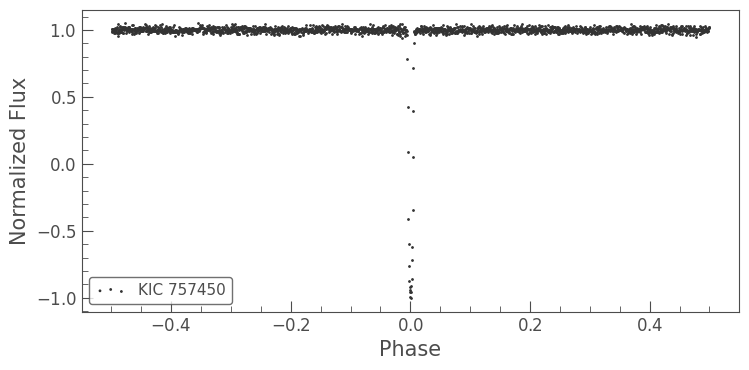

In [10]:
lc_global.scatter();

In [11]:
phase_mask = (lc_fold.phase > -4*fractional_duration) & (lc_fold.phase < 4.0*fractional_duration)
lc_zoom = lc_fold[phase_mask]

In [12]:
lc_local = lc_zoom.bin(bins=201, method='median').normalize() -1
lc_local = (lc_local / np.abs(lc_local.flux.min()) ) * 2.0 + 1
lc_local.flux.shape

/usr/local/lib/python3.6/dist-packages/lightkurve/lightcurve.py:702: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  LightkurveWarning)


(201,)

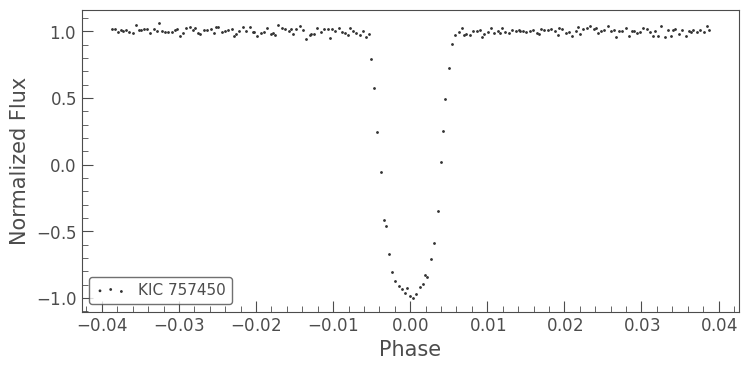

In [13]:
lc_local.scatter();